In [1]:
!pip install scikit-learn matplotlib seaborn


In [2]:
from google.colab import files
uploaded = files.upload()


Saving filtered_comments.csv to filtered_comments.csv



🔹 Eğitim Oranı: %70

🔸 Genel Metrikler:
Accuracy:  0.6804
Precision: 0.6736
Recall:    0.6804
F1 Score:  0.6762

🔸 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

    negative     0.6863    0.7105    0.6982      1050
     neutral     0.5416    0.4895    0.5143      1050
    positive     0.7928    0.8411    0.8163      1051

    accuracy                         0.6804      3151
   macro avg     0.6736    0.6804    0.6762      3151
weighted avg     0.6736    0.6804    0.6763      3151



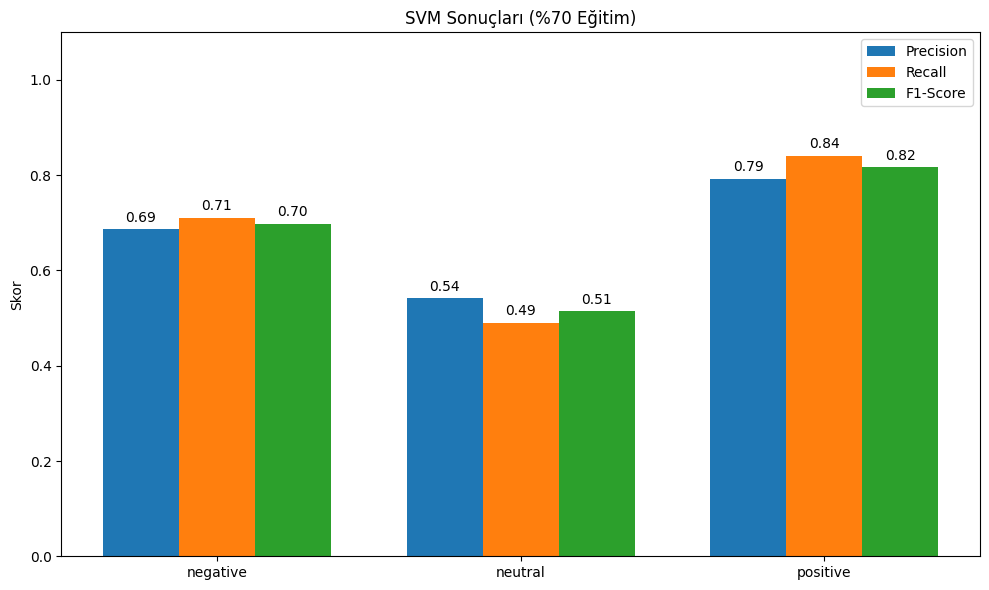

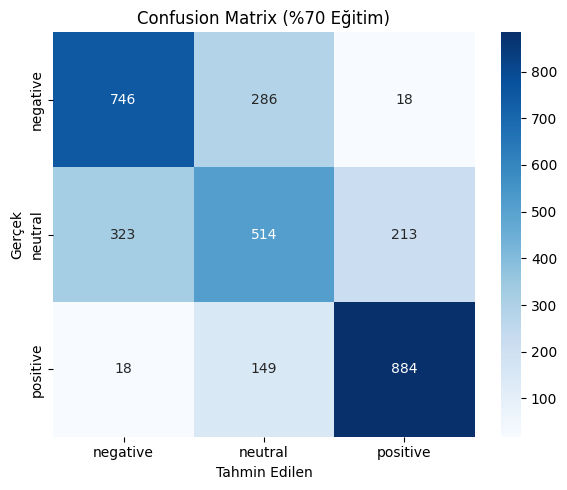


🔹 Eğitim Oranı: %80

🔸 Genel Metrikler:
Accuracy:  0.6838
Precision: 0.6755
Recall:    0.6838
F1 Score:  0.6785

🔸 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

    negative     0.6946    0.7214    0.7078       700
     neutral     0.5462    0.4814    0.5118       700
    positive     0.7857    0.8486    0.8159       700

    accuracy                         0.6838      2100
   macro avg     0.6755    0.6838    0.6785      2100
weighted avg     0.6755    0.6838    0.6785      2100



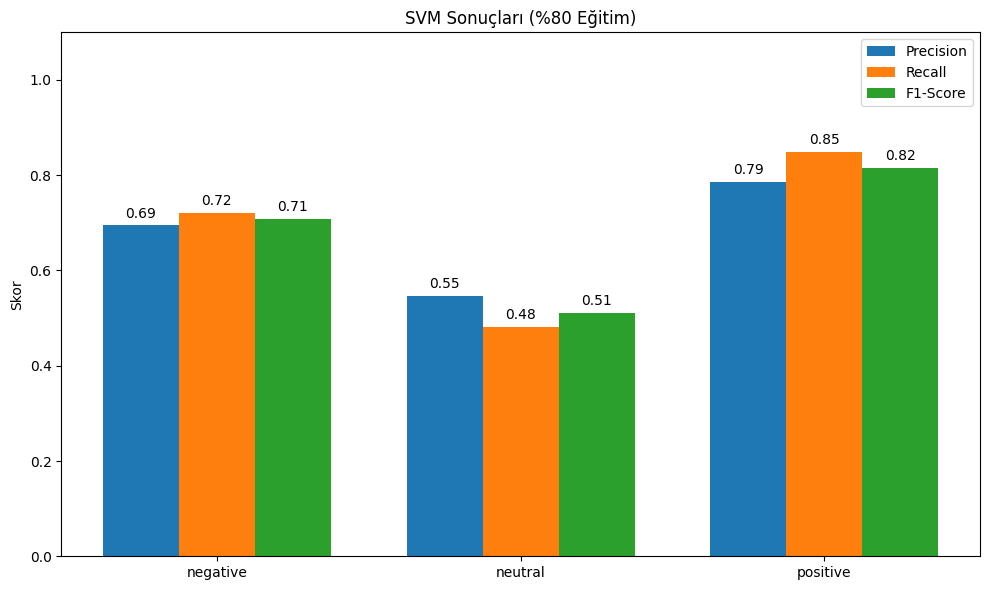

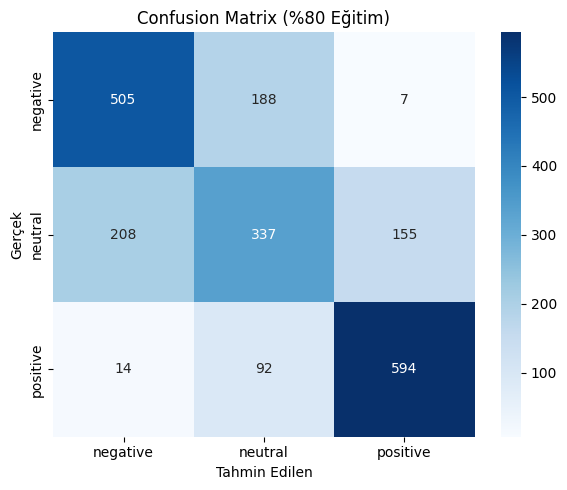

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Dosya adını al
csv_filename = next(iter(uploaded))

# Veriyi oku
df = pd.read_csv(csv_filename)

# Metin ve etiketler
X = df['commentText'].astype(str)
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # string -> 0/1/2
class_labels = le.classes_.tolist()

# Eğitim oranları
train_ratios = [0.7, 0.8]

# TF-IDF vektörleyici
vectorizer = TfidfVectorizer()

for ratio in train_ratios:
    print(f"\n{'='*40}\n🔹 Eğitim Oranı: %{int(ratio*100)}\n{'='*40}")

    # Eğitim/test bölmesi
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1 - ratio, stratify=y, random_state=42
    )

    # TF-IDF dönüşümü
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # SVM modeli
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_vec, y_train)

    # Tahmin
    y_pred = svm_model.predict(X_test_vec)

    # Genel metrikler
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("\n🔸 Genel Metrikler:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Sınıf bazlı rapor
    print("\n🔸 Sınıf Bazlı Rapor:\n")
    print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

    # Sınıf bazlı bar grafiği
    precision_c = precision_score(y_test, y_pred, average=None)
    recall_c = recall_score(y_test, y_pred, average=None)
    f1_c = f1_score(y_test, y_pred, average=None)

    x = np.arange(len(class_labels))
    width = 0.25

    plt.figure(figsize=(10, 6))
    b1 = plt.bar(x - width, precision_c, width, label='Precision')
    b2 = plt.bar(x, recall_c, width, label='Recall')
    b3 = plt.bar(x + width, f1_c, width, label='F1-Score')

    for bars in [b1, b2, b3]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

    plt.xticks(ticks=x, labels=class_labels)
    plt.ylim(0, 1.1)
    plt.title(f"SVM Sonuçları (%{int(ratio*100)} Eğitim)")
    plt.ylabel("Skor")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"Confusion Matrix (%{int(ratio*100)} Eğitim)")
    plt.tight_layout()
    plt.show()
